In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 2. Load the Dataset
df = pd.read_csv('Cardiotocographic.csv')

# Preview the data
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
# 3. Data Cleaning and Preparation

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Handle missing values (if any)
# For this example, we'll drop rows with missing values
df_cleaned = df.dropna()

# Check data types
print("\nData Types:\n", df_cleaned.dtypes)

# Convert data types if necessary
# (Assuming all are numeric, else use df_cleaned['col'] = df_cleaned['col'].astype(float))

# Detect outliers using IQR Method
def detect_outliers(col):
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    return outliers

# Example: Check for outliers in 'LB'
outliers_LB = detect_outliers('LB')
print(f"\nNumber of Outliers in LB: {len(outliers_LB)}")

# (Optional) You could remove outliers if needed:
# df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers_LB.index)]


Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Number of Outliers in LB: 10


In [5]:
# 4. Statistical Summary

# Descriptive statistics
summary_stats = df_cleaned.describe()
print("Statistical Summary:\n", summary_stats)

# Additional: Median and IQR
for col in df_cleaned.columns:
    median = df_cleaned[col].median()
    iqr = df_cleaned[col].quantile(0.75) - df_cleaned[col].quantile(0.25)
    print(f"\n{col} -> Median: {median}, IQR: {iqr}")


Statistical Summary:
                 LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001

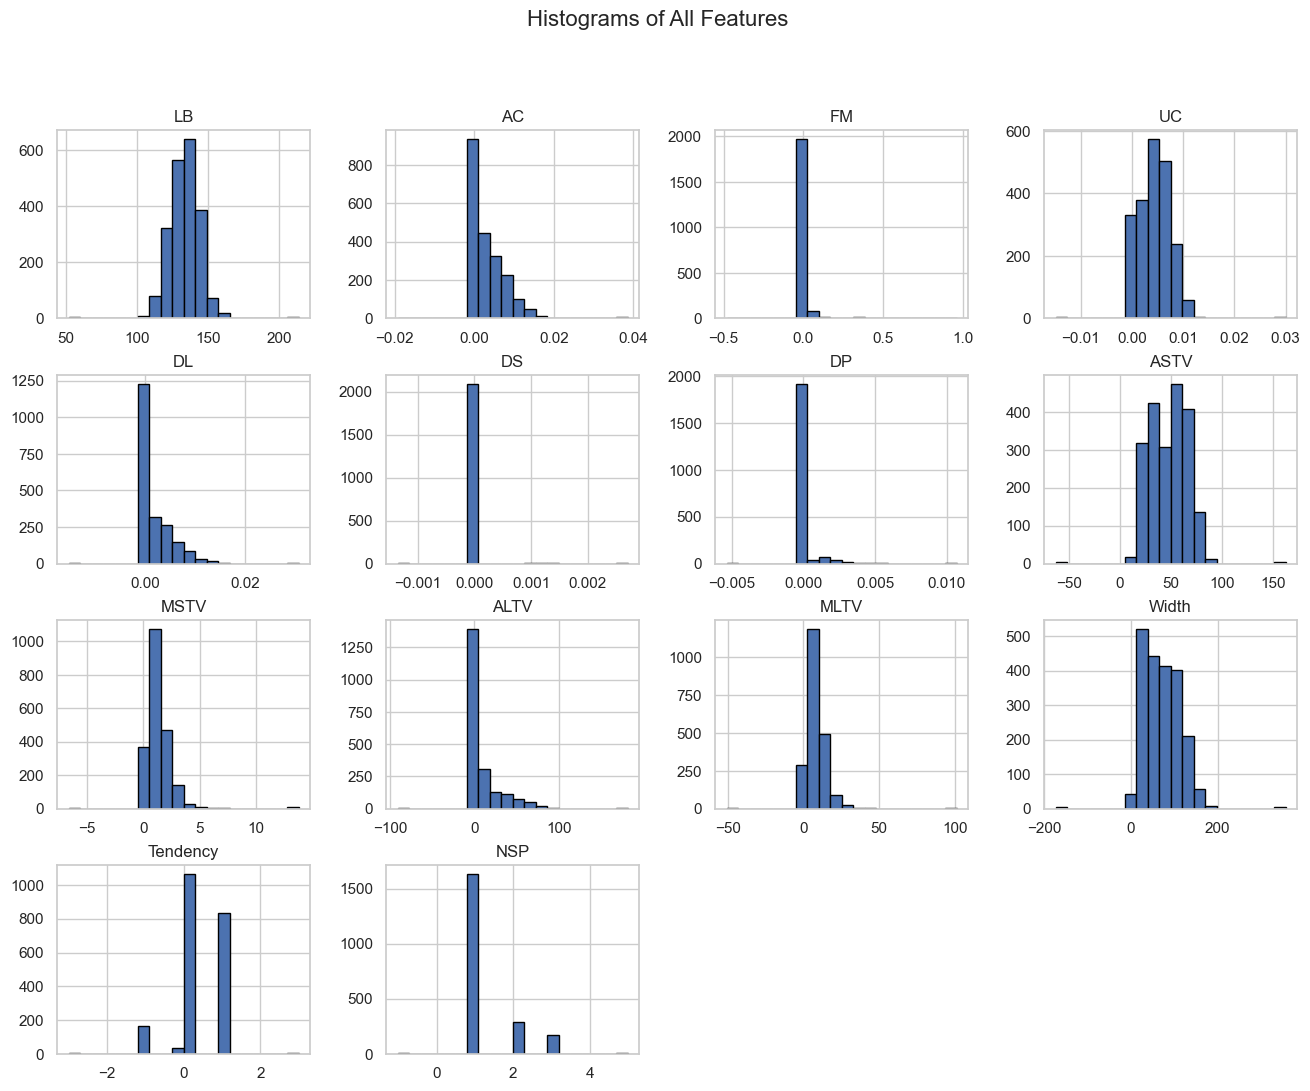

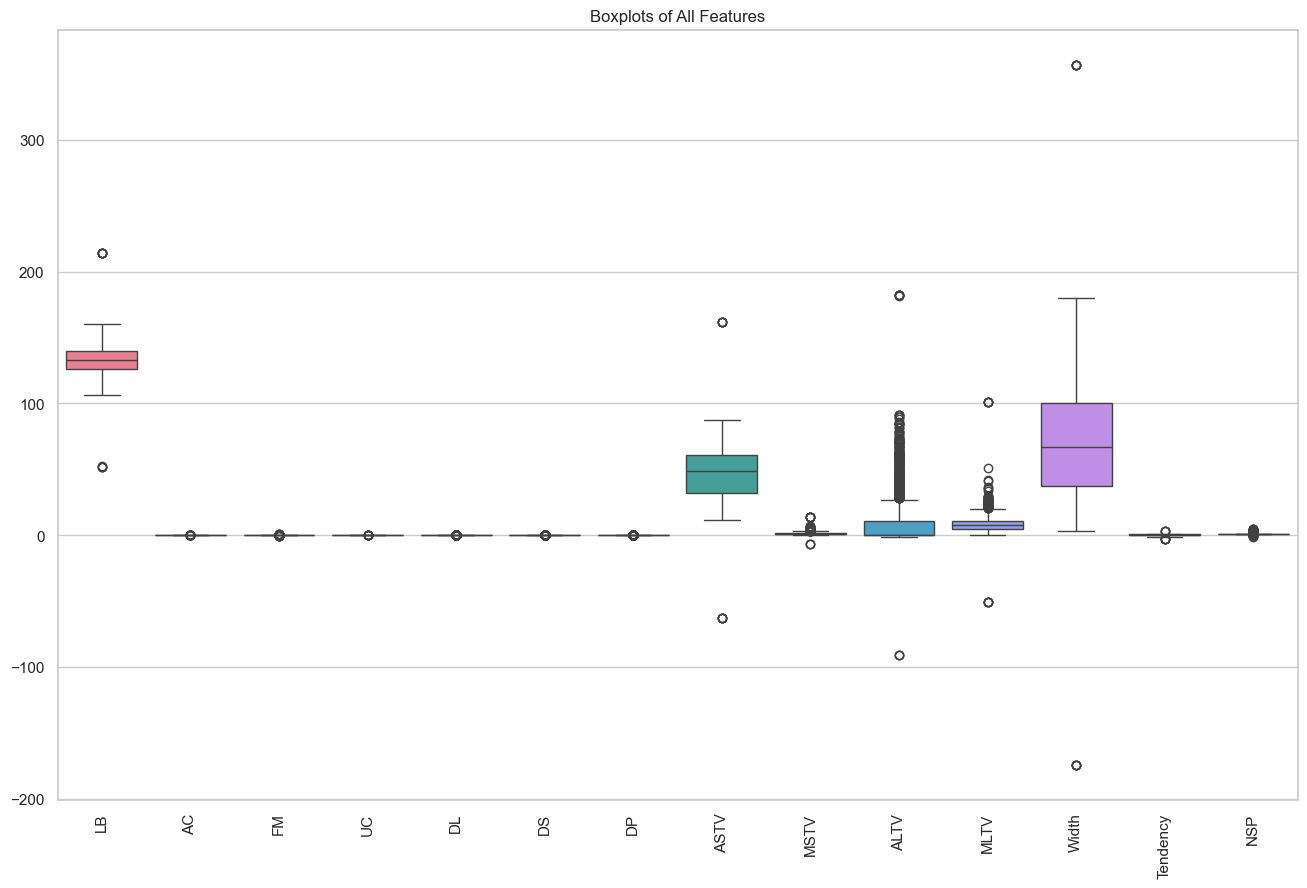

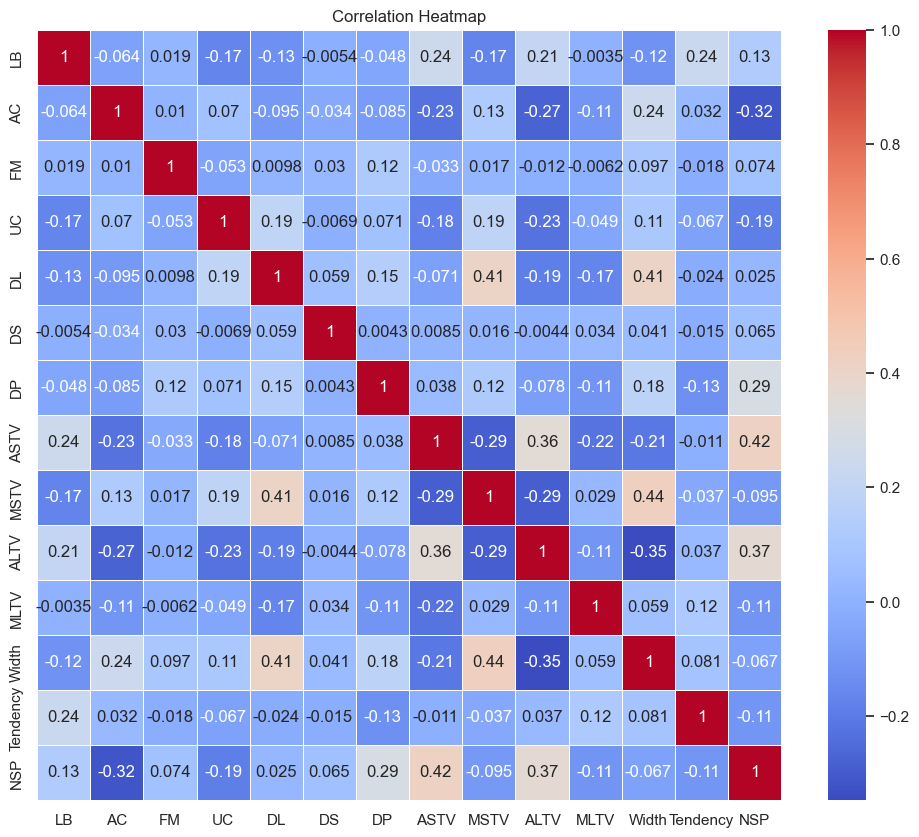

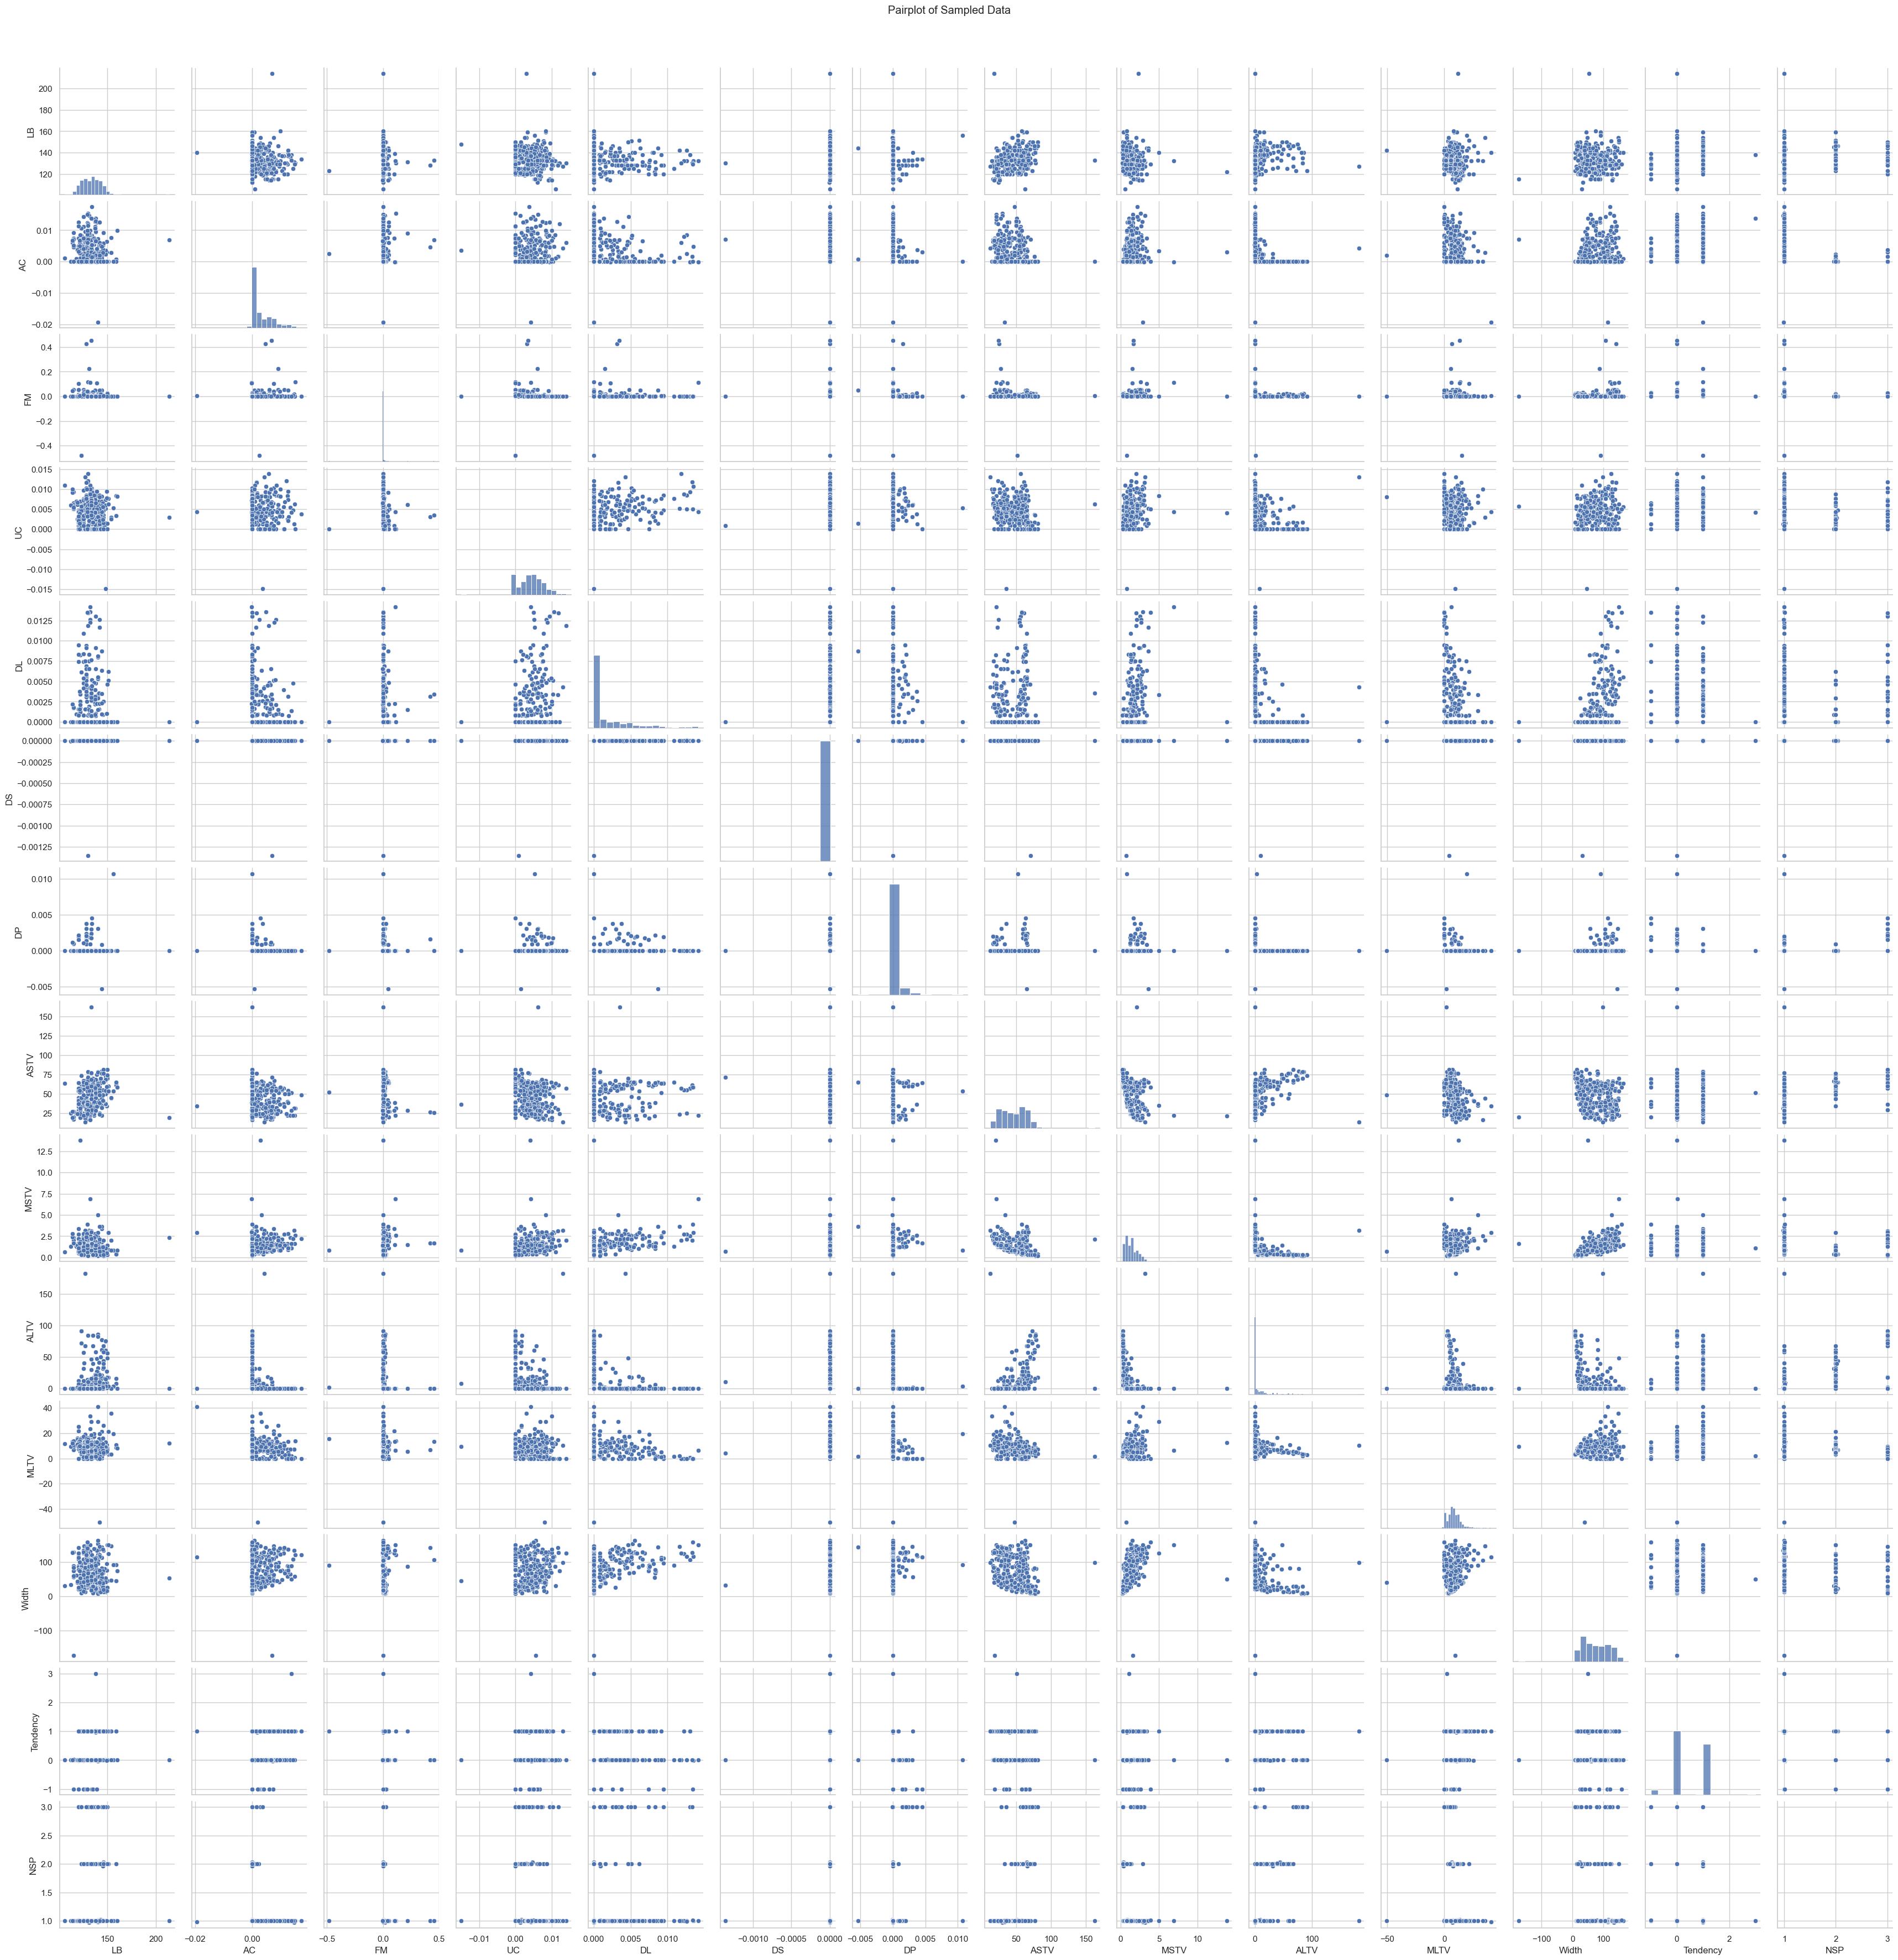

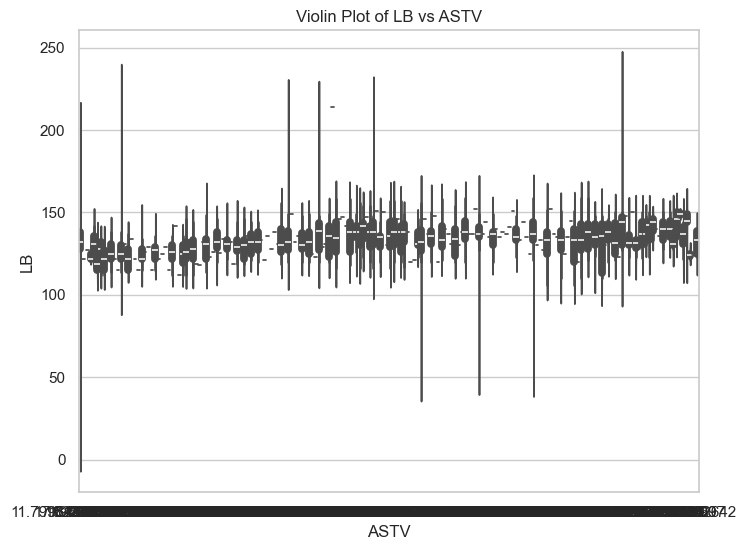

In [7]:
# 5. Data Visualization

# Histograms
df_cleaned.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(16,10))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Boxplots of All Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot (Advanced)
sns.pairplot(df_cleaned.sample(300))  # sample to reduce computation if dataset is big
plt.suptitle('Pairplot of Sampled Data', y=1.02)
plt.show()

# Violin Plot Example: LB vs ASTV
plt.figure(figsize=(8, 6))
sns.violinplot(x="ASTV", y="LB", data=df_cleaned)
plt.title('Violin Plot of LB vs ASTV')
plt.show()


In [9]:
# 6. Pattern Recognition and Insights

# Strongest correlations
strong_corr = corr_matrix.unstack().sort_values(ascending=False)
# Exclude self-correlation (1.0)
strong_corr = strong_corr[strong_corr != 1.0]
print("\nTop correlations:\n", strong_corr.head(10))

# Insights example:
# If ASTV and ALTV have strong negative correlation, it suggests one goes up, the other goes down.



Top correlations:
 Width  MSTV     0.435393
MSTV   Width    0.435393
NSP    ASTV     0.422652
ASTV   NSP      0.422652
DL     MSTV     0.410155
MSTV   DL       0.410155
Width  DL       0.410031
DL     Width    0.410031
NSP    ALTV     0.365846
ALTV   NSP      0.365846
dtype: float64


In [14]:
# 7. Conclusion

# Printing Key Findings and Recommendations using Python

conclusion_text = """
Key Findings:
- Some variables show strong correlations (e.g., ASTV and ALTV).
- Outliers detected especially in LB and UC columns.
- Distribution of most variables appears normal with a few skewed distributions.
- Further analyses like predictive modeling (e.g., classification tasks) could be valuable.

Recommendations:
- Consider treating outliers before building machine learning models.
- Focus on highly correlated features for future predictive modeling.
"""

print(conclusion_text)



Key Findings:
- Some variables show strong correlations (e.g., ASTV and ALTV).
- Outliers detected especially in LB and UC columns.
- Distribution of most variables appears normal with a few skewed distributions.
- Further analyses like predictive modeling (e.g., classification tasks) could be valuable.

Recommendations:
- Consider treating outliers before building machine learning models.
- Focus on highly correlated features for future predictive modeling.

